In [1]:
envname = 'variables/loop_stim10e-16.0et6.0ph1.0p1.0t0.1plvarybpvary.pkl'

In [2]:
# import stuff
from placerg.funcs import *
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [3]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
fontsize=20
ticksize=20
fontsizesmall=25
ticksizesmall=20
legendsize=20
alpha=.3
colorfit='gray'
linecolor='black'
palit=['black','firebrick', 'crimson', 'orangered', 'darkorange', 'goldenrod', 'gold', 'khaki']
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# load in objects
allo=load_object(envname)

In [5]:
if allo.labeltype[0]=='eta':
    maxx=np.max(np.array(allo.eta).flatten())
    minn=np.min(np.array(allo.eta).flatten())
    cc=allo.eta
if allo.labeltype[0]=='epsilon':
    maxx=np.max(np.array(allo.epsilon).flatten())
    minn=np.min(np.array(allo.epsilon).flatten())
    cc=allo.epsilon
if allo.labeltype[0]=='time constant':
    maxx=np.max(np.array(allo.timeconst).flatten())
    minn=np.min(np.array(allo.timeconst).flatten())
    cc=np.array(allo.timeconst)[:,0]
if allo.labeltype[0]=='# of stimuli':
    maxx=np.max(np.array(allo.stim).flatten())
    minn=np.min(np.array(allo.stim).flatten())
    cc=allo.stim
if allo.labeltype[0]=='p':
    maxx=np.max(np.array(allo.percell).flatten())
    minn=np.min(np.array(allo.percell).flatten())
    cc=allo.percell
if allo.labeltype[0]=='cell type':
    maxx=4
    minn=1
    cc=allo.percell
mrange=maxx-minn

In [6]:
#place+latent, latent only, place place only, all
allo.label=['all', 'place+latent', 'latent only', 'place only']

# variance of activity at each RG step over clusters

/home/mia/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


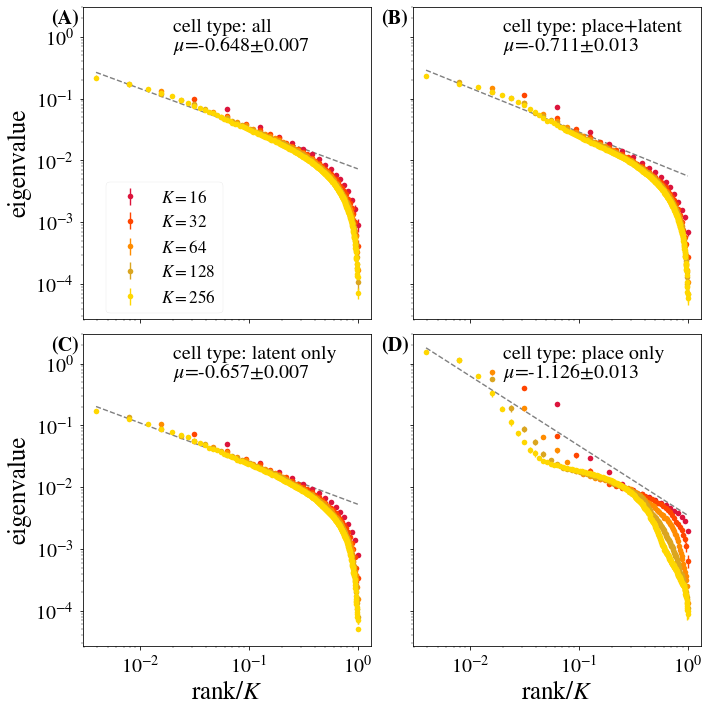

In [17]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2),  sharey=True, sharex=True, figsize=(10,10))
ax[0,0].set_ylabel('eigenvalue', fontsize=fontsizesmall)
ax[1,0].set_ylabel('eigenvalue', fontsize=fontsizesmall)
ax[1,1].set_xlabel('rank$/K$', fontsize=fontsizesmall)
ax[1,0].set_xlabel('rank$/K$', fontsize=fontsizesmall)
for n in range(2):
    for l in range(int(len(allo.eigspec)/2)):
        errplot=allo.eigspecerr[n*2+l]
        xplot,plot=(allo.eigspecx[n*2+l], allo.eigspec[n*2+l])
        for m in range(len(xplot)):
            ax[n,l].errorbar(xplot[m], plot[m], yerr=errplot[m], \
                         label= r'$K=$'+str(2**(m+4)), color=palit[m+2], marker='o', linestyle='None')
        popt=allo.mu[n*2+l]
        ax[n,l].plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit)
        ax[n,l].tick_params(labelsize=ticksizesmall)
        ax[n,l].text(.02, 1.2, str(allo.labeltype[n*2+l])+': '+str(allo.label[n*2+l]), fontsize=ticksizesmall)
        ax[n,l].text(.02, .6, r'$\mu$='+ str(np.round(popt[1],3))+r'$\pm$'+str(np.round(allo.muerr[l][0], 3)), \
                   fontsize=ticksizesmall)
        ax[n,l].set_yscale('log')
        ax[n,l].set_xscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=fontsize-3, loc=(.15,.56))
ax[0,0].text(.0015,1.6,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.0015,1.6,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.0015,1.6,'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.0015,1.6,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'eigs.pdf'
plt.savefig(name)

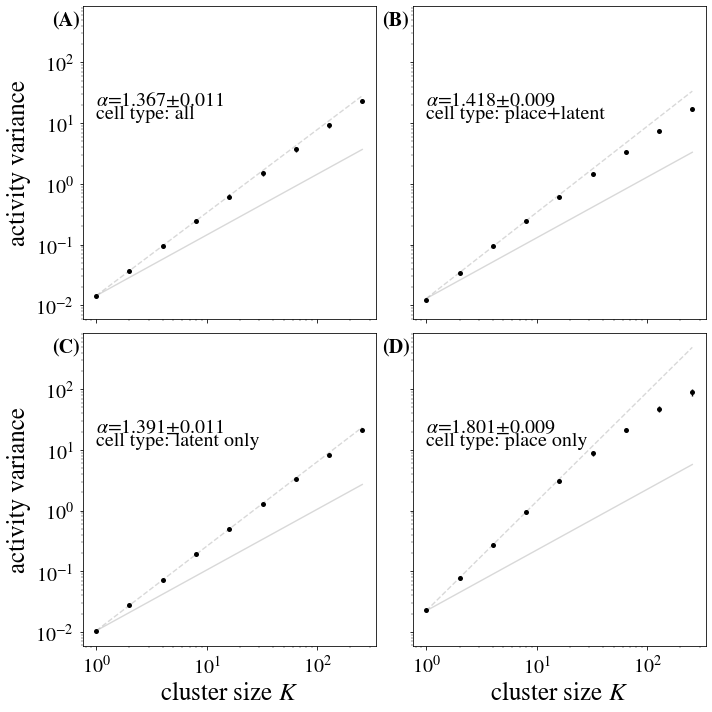

In [58]:
"""
plot coarse grained variance vs. cluster size
"""
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2),  sharey=True, sharex=True, figsize=(10,10))
ax[0,0].set_ylabel(r'activity variance', fontsize=fontsizesmall)
ax[1,0].set_ylabel(r'activity variance', fontsize=fontsizesmall)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
for n in range(2):
    for i in range(int(len(allo.eigspec)/2)):
        ax[n,i].errorbar(allo.varx[2*n+i],allo.var[2*n+i],  allo.varerr[2*n+i], \
                    color='black', marker='o', linestyle='None', markersize=5)
        popt = allo.alpha[2*n+i]
        ax[n,i].plot(allo.varx[2*n+i],linfunc(allo.varx[2*n+i], \
                                popt[0], popt[1]), '--', color=colorfit, alpha=alpha)
        ax[n,i].plot(allo.varx[2*n+i], linfunc(allo.varx[2*n+i], popt[0], 1.), \
                     alpha=alpha, color=colorfit)
        ax[n,i].text(1, 20, r'${\alpha}$='+ str(np.round(popt[1],3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[i][0], 3)), fontsize=ticksizesmall)
        ax[n,i].tick_params(labelsize=ticksizesmall)
        ax[n,i].text(1,12,str(allo.labeltype[2*n+i])+': '+str(allo.label[2*n+i]), fontsize=ticksize)
        ax[n,i].set_yscale('log')
        ax[n,i].set_xscale('log')
ax[0,0].text(.4,400,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.4,400,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.4,400,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.4,400,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'var.pdf'
plt.savefig(name)

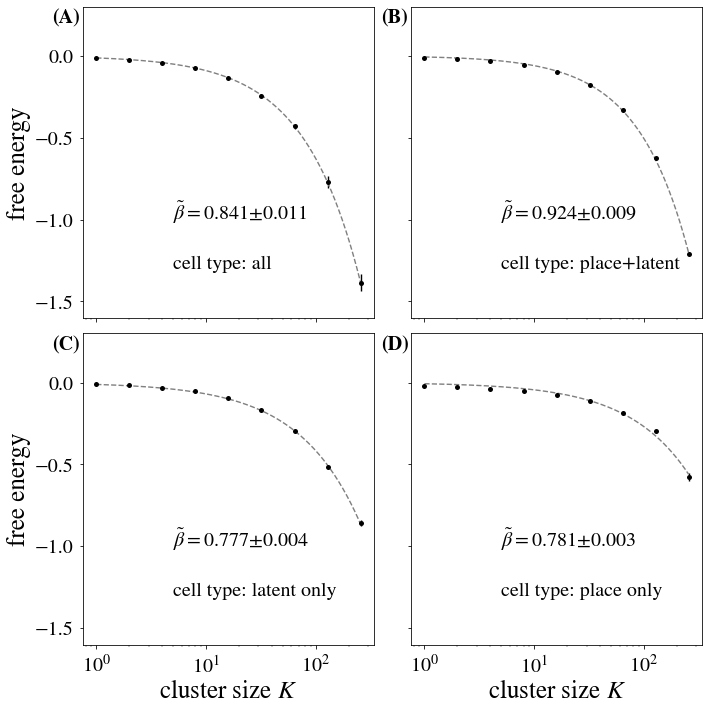

In [32]:
"""
Plot log probability of complete cluster silence vs cluster size
"""
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2),  sharey=True, sharex=True, figsize=(10,10))
ax[0,0].set_ylabel(r'free energy', fontsize=fontsizesmall)
ax[1,0].set_ylabel(r'free energy', fontsize=fontsizesmall)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
for n in range(2):
    for i in range(int(len(allo.eigspec)/2)):
        x=allo.psilx[2*n+i]
        y=allo.psil[2*n+i]
        popt= allo.beta[2*n+i]
        ax[n,i].errorbar(allo.psilx[2*n+i], allo.psil[2*n+i],allo.psilerr[2*n+i], \
                      color='black', marker='o', \
                       linestyle='None', markersize=5)
        ax[n,i].plot(np.arange(np.min(allo.psilx[2*n+i]),np.max(allo.psilx[2*n+i]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[2*n+i]),np.max(allo.psilx[2*n+i]), .01), \
                           popt[0], popt[1])), '--', color=colorfit)
        ax[n,i].text(5, -1.0, r'$\tilde{\beta}=$'+str(np.round(popt[1], 3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[2*n+i][0], 3)), fontsize=ticksizesmall)
        ax[n,i].text(5,-1.3,str(allo.labeltype[2*n+i])+': '+str(allo.label[2*n+i]),fontsize=ticksize)
        ax[n,i].tick_params(labelsize=ticksizesmall)
        ax[n,i].set_xscale('log')
        ax[n,i].set_ylim(top=0.3, bottom=-1.6)
ax[0,0].text(.4,.2,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.4,.2,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.4, .2,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.4,.2,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'freeenergy.pdf'
plt.savefig(name)

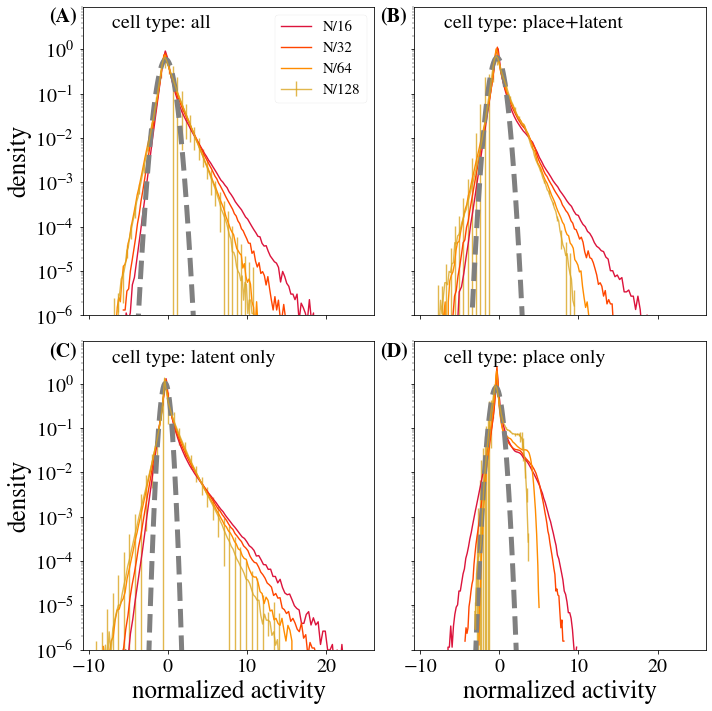

In [64]:
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2), figsize=(10,10), sharex=True, sharey=True)
ax[1,0].set_xlabel('normalized activity', fontsize=fontsizesmall)
ax[1,1].set_xlabel('normalized activity', fontsize=fontsizesmall)
ax[0,0].set_ylabel('density', fontsize=fontsizesmall)
ax[1,0].set_ylabel('density', fontsize=fontsizesmall)
for n in range(2):
    for l in range(int(len(allo.eigspec)/2)):
        for i in (np.arange(len(allo.actmomx[0]))):
            if i==3:
                ax[n,l].errorbar(x[n*2+l][i],plott[n*2+l][i], plterr[n*2+l][i], label='N/'+str(2**(i+4)), \
                          color=palit[i+2], alpha=.8, errorevery=3)
                popt, pcov = curve_fit(gaussian,x[n*2+l][i], plott[n*2+l][i])
                ax[n,l].plot(np.arange(-4, 4,.1), \
                    gaussian(np.arange(-4, 4, .1),\
                    popt[0], popt[1]), '--', color=colorfit, linewidth=5)
            else:
                ax[n,l].plot(x[n*2+l][i],plott[n*2+l][i], label='N/'+str(2**(i+4)), \
                          color=palit[i+2])
            
        ax[n,l].text(-7, 3, str(allo.labeltype[n*2+l])+': '+str(allo.label[n*2+l]), fontsize=ticksize)
        ax[n,l].tick_params(labelsize=ticksizesmall)
        ax[n,l].set_yscale('log')
        ax[n,l].set_ylim(bottom=10**-6 , top=9)
ax[0,0].legend(fontsize=fontsize-5)
ax[0,0].text(-15,4,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-15,4,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-15,4,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-15,4,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'momdist.pdf'
plt.savefig(name)

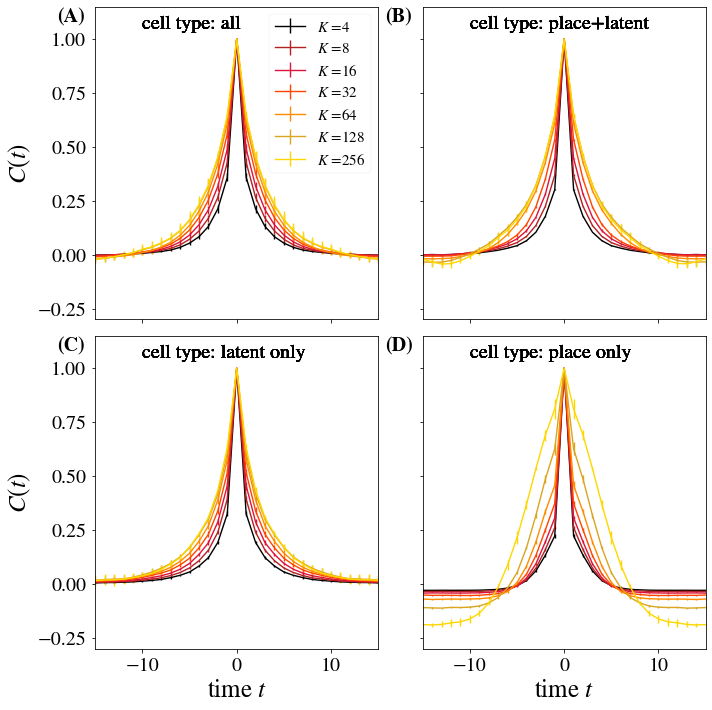

In [9]:
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2), \
                       sharey=True, sharex=True, figsize=(10,10))
ax[1,0].set_xlabel(r'time $t$', fontsize=fontsizesmall)
ax[1,1].set_xlabel(r'time $t$', fontsize=fontsizesmall)
ax[0,0].set_ylabel(r'$C(t)$', fontsize=fontsizesmall)
ax[1,0].set_ylabel(r'$C(t)$', fontsize=fontsizesmall)
for n in range(2):
    for l in range(int(len(allo.eigspec)/2)):
        for i in range(result[2*n+l].shape[0]):
            #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
            ax[n,l].errorbar((x[2*n+l][int(result[2*n+l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20]), \
                     (result[2*n+l][i, int(result[l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20]),\
                       (plterr[2*n+l][i][int(result[2*n+l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=palit[i])
            ax[n,l].text(-10, 1.05, str(allo.labeltype[2*n+l])+': '+str(allo.label[2*n+l]), fontsize=ticksize)
            ax[n,l].tick_params(labelsize=ticksizesmall)
        ax[n,l].set_ylim(top=1.15, bottom=-.3)
        ax[n,l].set_xlim(left=-15,right=15)
ax[0,0].legend(fontsize=fontsize-5)
ax[0,0].text(-19,1.08,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-19,1.08,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-19,1.08,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-19,1.08,r'(D)', fontsize=ticksize, weight='bold')  
plt.tight_layout()
name=str(envname)+'dynamic.pdf'
plt.savefig(name)

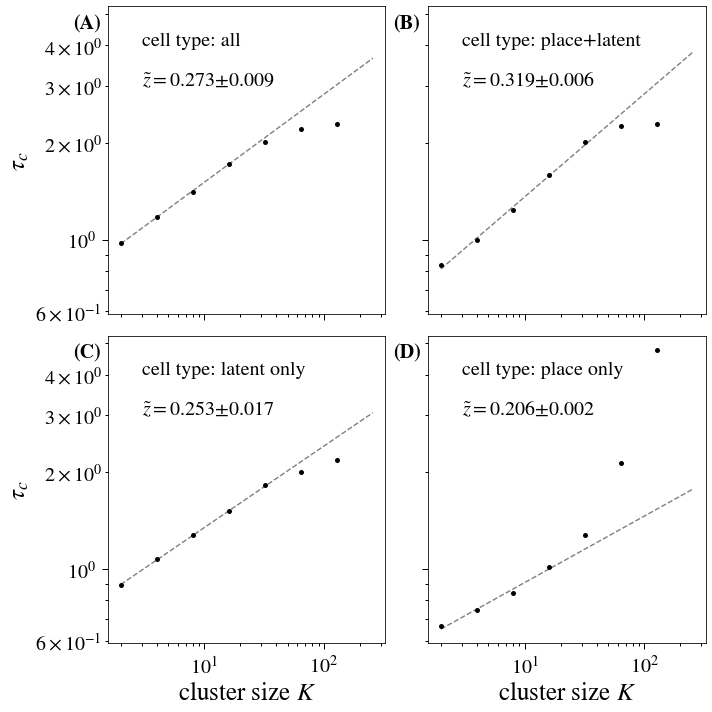

In [18]:
"""
plot exponents
"""
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2),  sharey=True, sharex=True, figsize=(10,10))
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
ax[0,0].set_ylabel(r'$\tau_c$', fontsize=fontsizesmall)
ax[1,0].set_ylabel(r'$\tau_c$', fontsize=fontsizesmall)
for n in range(2):
    for l in range(int(len(allo.eigspec)/2)):
        ax[n,l].errorbar(2**np.arange(1,8),allo.tau[2*n+l],color=colorline, \
              label='taus', marker='o', linestyle='None', markersize=5)
        popt= allo.z[2*n+l]
       # print(popt[1])
        ax[n,l].plot(2**np.arange(1,9), linfunc(2**np.arange(1,9), \
                                    popt[0], popt[1]), '--', label='fit', color=colorfit)
        ax[n,l].tick_params(labelsize=ticksizesmall)
        #ax[l].legend(fontsize=ticksize)
        ax[n,l].text(3, 3, r'$\tilde{z}=$'+str(np.format_float_positional(popt[1],unique=False, precision=3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.zerr[2*n+l][0], unique=False, precision=3)), fontsize=ticksizesmall)
        ax[n,l].set_yscale('log')
        ax[n,l].set_xscale('log')
        ax[n,l].text(3,4, str(allo.labeltype[2*n+l])+': '+str(allo.label[2*n+l]), fontsize=ticksizesmall)
for n in range(2):
    for l in range(2):
        ax[n,l].tick_params(length=6, width=1, which='major', labelsize=ticksize)
        ax[n,l].tick_params(length=3, width=1, which='minor', labelsize=ticksize)
ax[0,0].text(.8,4.5,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.8,4.5,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.8,4.5,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.8,4.5,r'(D)', fontsize=ticksize, weight='bold')  
plt.tight_layout()
name=str(envname)+'dynamicexps.pdf'
plt.savefig(name)

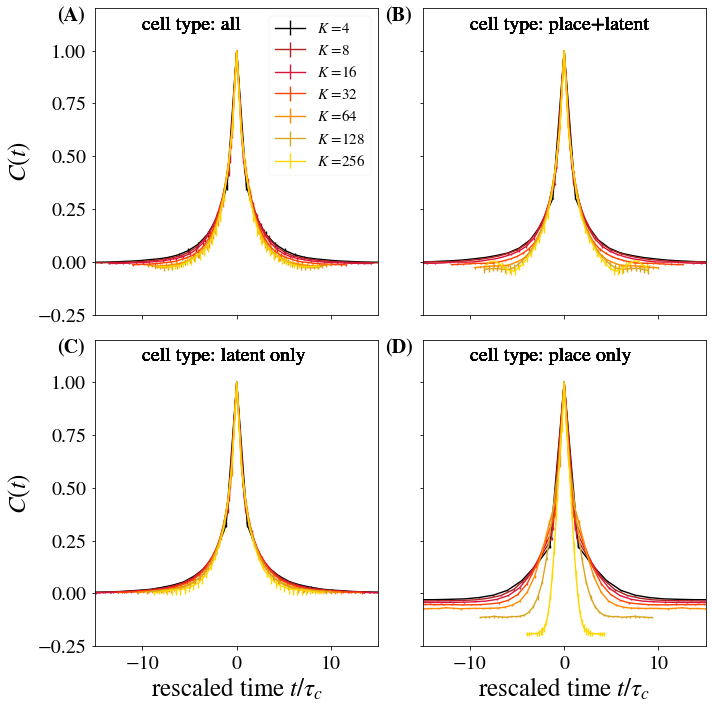

In [10]:
"""
now rescale each mean autocorrelation curve by its respective time constant
"""
fig, ax = plt.subplots(2,int(len(allo.eigspec)/2),  sharey=True, sharex=True, figsize=(10,10))
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
ax[1,0].set_xlabel(r'rescaled time $t/\tau_c$', fontsize=fontsizesmall)
ax[1,1].set_xlabel(r'rescaled time $t/\tau_c$', fontsize=fontsizesmall)
ax[0,0].set_ylabel(r'$C(t)$', fontsize=fontsizesmall)
ax[1,0].set_ylabel(r'$C(t)$', fontsize=fontsizesmall)
for n in range(2):
    for l in range(int(len(allo.eigspec)/2)):
        for i in range(result[2*n+l].shape[0]):
            #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
            ax[n,l].errorbar((x[2*n+l][int(result[2*n+l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20])/allo.tau[2*n+l][i], \
                     (result[2*n+l][i, int(result[2*n+l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20]),\
                       (plterr[2*n+l][i][int(result[2*n+l].shape[1]/2)-20:int(result[2*n+l].shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=palit[i])
            ax[n,l].text(-10,1.1,str(allo.labeltype[2*n+l])+': '+str(allo.label[2*n+l]), fontsize=ticksize)
            ax[n,l].tick_params(labelsize=ticksizesmall)
        ax[n,l].set_ylim(top=1.2, bottom=-0.25)
        ax[n,l].set_xlim(-15,15)
ax[0,0].legend(fontsize=fontsize-5)
ax[0,0].text(-19,1.14,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-19,1.14,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-19,1.14,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-19,1.14,r'(D)', fontsize=ticksize, weight='bold') 
plt.tight_layout()
name=str(envname)+'dynamicrescale.pdf'
plt.savefig(name)